In [233]:
#importing the libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train= pd.read_csv(r"C:\Users\Sunnation\Desktop\Python\PP_Energy_Project\Train.csv")
test= pd.read_csv(r"C:\Users\Sunnation\Desktop\Python\PP_Energy_Project\Test.csv")

In [272]:
test.head()

AT      V       AP     RH
0  16.98  53.16  1013.95  82.80
1   9.60  41.03  1021.01  69.03
2   6.11  38.68  1017.53  79.23
3  12.34  43.22  1009.28  78.23
4  27.67  59.14  1016.51  61.20

In [273]:
train.head()

AT      V       AP     RH          PE
0  29.07  72.51  1009.24  58.38  449.371855
1  32.38  67.17  1006.97  60.04  450.861043
2  19.29  67.71  1007.94  63.71  460.894029
3  16.45  41.48  1016.64  45.21  467.577314
4  21.43  46.97  1013.94  61.25  469.805723

In [236]:
#***********************************************************************************
#This is already given in the website as a description. 
# Features consist of hourly average ambient variables

# Temperature (T) in the range 1.81°C and 37.11°C
#  Ambient Pressure (AP) in the range 992.89-1033.30 millibar
#  Relative Humidity (RH) in the range of 25.56% to 100.16%
# Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
# Net hourly electrical energy output (PE) 420.26-495.76 MW

#**************************************************************************************
#I want to convert the units of the variables to the SI unit. 

#Temperature: is already in the SI unit.
#Ambient Pressure: It's SI unit is Pascal and 1 millibar=100 pascal.
#Relative humidity: is ratio. However, the percentage will be converted to decimal
#Exhaust Vacuum: is a pressure unit and similar to Ambient Pressure which is Pascal.1 cm Hg to pascal = 1333.2239 pascal
#PE: it's SI unit is Joule. 1MW=100,000,0 Joules

#These information are found by google search. 

Joining the test and train data for the combined change in units. We have to remove the PE column from train set to equalize the number of columns

In [274]:
merged= pd.concat([train, test])

In [276]:
merged.head()
merged.tail()

AT      V       AP     RH  PE
38267  14.60  53.82  1016.28  64.83 NaN
38268  29.67  66.51  1015.60  34.10 NaN
38269  20.13  47.03  1012.59  83.03 NaN
38270  27.14  70.32  1007.08  73.08 NaN
38271  18.82  61.27  1019.50  72.23 NaN

In [245]:
# #I will take out the target variable from the data
# PE=train['PE']

In [277]:
#converting the Units
#i will make a new datafrma
merged_conv= pd.DataFrame(merged['AT'])

In [278]:
#converted the Exhaust Vaccum column
merged_conv['V']= merged['V']*1333.2239

In [279]:
#Converted the Ambient Pressure
merged_conv['AP']= merged['AP']*100

In [280]:
#converting the 'RH' column
merged_conv['RH']= merged['RH']/100

In [301]:
merged_conv['PE']=merged['PE']*1000000

In [302]:
merged_conv.head()

AT             V        AP      RH            PE
0  29.07  96672.064989  100924.0  0.5838  4.493719e+08
1  32.38  89552.649363  100697.0  0.6004  4.508610e+08
2  19.29  90272.590269  100794.0  0.6371  4.608940e+08
3  16.45  55302.127372  101664.0  0.4521  4.675773e+08
4  21.43  62621.526583  101394.0  0.6125  4.698057e+08

Looking the information and description of the data

In [303]:
merged_conv.info()
#the PE has null as it also contains the test data. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47840 entries, 0 to 38271
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      47840 non-null  float64
 1   V       47840 non-null  float64
 2   AP      47840 non-null  float64
 3   RH      47840 non-null  float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 2.2 MB


In [304]:
#descriptive stat of the feature columns
merged_conv.describe()

AT              V             AP            RH            PE
count  47840.000000   47840.000000   47840.000000  47840.000000  9.568000e+03
mean      19.651231   72401.795429  101325.907818      0.733090  4.664740e+08
std        7.452162   16941.758337     593.853542      0.145997  1.704083e+07
min        1.810000   33810.558104   99289.000000      0.255600  4.335063e+08
25%       13.510000   55648.765586  100910.000000      0.633275  4.518939e+08
50%       20.345000   69434.300712  101294.000000      0.749750  4.633795e+08
75%       25.720000   88712.718306  101726.000000      0.848300  4.805658e+08
max       37.110000  108737.741284  103330.000000      1.001600  5.093815e+08

Visulaization of the data

In [66]:
!pip install chart_studio
import chart_studio.plotly as py

In [286]:
import plotly.figure_factory as ff

In [287]:
import plotly.express as px
px.box(data_frame=merged_conv, x='AT')

In [288]:
px.box(data_frame=merged_conv, x='V')

In [289]:
px.box(data_frame=merged_conv, x='AP')

In [290]:
px.box(data_frame=merged_conv, x='RH')

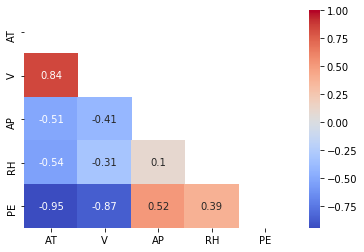

In [305]:
#correlation plot
sns.heatmap(merged_conv.corr(),annot=True,cmap='coolwarm', mask=np.triu(merged_conv.corr()))

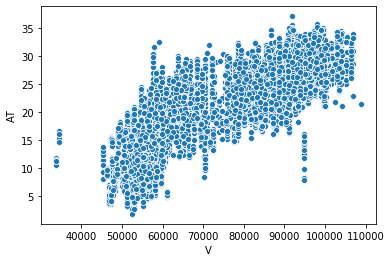

In [306]:
sns.scatterplot(x='V', y='AT', data=merged_conv)

# Scaling the Data

In [307]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled=scaler.fit_transform(merged_conv)

In [308]:
#making the df of the scaled arraies
col_name= merged.columns

scaled_df= pd.DataFrame(scaled, columns=col_name)

In [311]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      47840 non-null  float64
 1   V       47840 non-null  float64
 2   AP      47840 non-null  float64
 3   RH      47840 non-null  float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 1.8 MB


Breaking the Train and Test Data

In [322]:
train_df=scaled_df.loc[scaled_df['PE'].notna()]
test_df=scaled_df.loc[scaled_df['PE'].isna()]

In [324]:
print(train_df.shape)
print(test_df.shape)

(9568, 5)
(38272, 5)


In [325]:
#removing the 'PE' column from the test dataset
test_df.drop(columns=['PE'], inplace=True)

In [328]:
test_df.head()
test_df.shape

(38272, 4)

In [112]:
!pip install pycaret

  Using cached pycaret-1.0.0-py3-none-any.whl (188 kB)
  Using cached DateTime-4.3-py2.py3-none-any.whl (60 kB)
  Using cached kmodes-0.10.1-py2.py3-none-any.whl (17 kB)
Processing c:\users\sunnation\appdata\local\pip\cache\wheels\16\22\f8\084326defc3fe232aacf4a4c855c58de34b62f35387acc1eda\cufflinks-0.17.0-py3-none-any.whl
Processing c:\users\sunnation\appdata\local\pip\cache\wheels\3b\fb\41\e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89\pyldavis-2.1.2-py2.py3-none-any.whl
  Using cached plotly-4.4.1-py2.py3-none-any.whl (7.3 MB)
  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
  Using cached mlxtend-0.17.2-py2.py3-none-any.whl (1.3 MB)
  Using cached awscli-1.18.105-py2.py3-none-any.whl (3.3 MB)
  Using cached xgboost-0.90-py2.py3-none-win_amd64.whl (18.3 MB)
  Using cached datefinder-0.7.0-py2.py3-none-any.whl (8.8 kB)
Processing c:\users\sunnation\appdata\local\pip\cache\wheels\14\9a\ed\66159a5e13d3b6341b6542cf4f1faf478834753bed5ecaef8d\umap_learn-0.4.6-py3-none-any.

In [329]:
from pycaret.regression import *

In [330]:
reg_models= setup(train_df, target='PE', session_id=1234)

 
Setup Succesfully Completed!


In [331]:
compare_models()

In [332]:
model= create_model('et')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.1096  0.0222  0.1489  0.9773  0.0852  0.0343
1     0.1198  0.0309  0.1759  0.9696  0.1001  0.0030
2     0.1107  0.0266  0.1631  0.9743  0.0893  0.0954
3     0.1206  0.0277  0.1664  0.9715  0.0931  0.0430
4     0.1218  0.0349  0.1869  0.9656  0.0990 -0.2840
5     0.1186  0.0300  0.1731  0.9708  0.0923 -0.0689
6     0.1265  0.0374  0.1935  0.9633  0.0921 -0.1392
7     0.1272  0.0339  0.1842  0.9645  0.1041 -0.0069
8     0.1275  0.0342  0.1849  0.9662  0.1027  0.7102
9     0.1134  0.0245  0.1565  0.9756  0.0861 -0.0640
Mean  0.1196  0.0302  0.1733  0.9699  0.0944  0.0323
SD    0.0062  0.0047  0.0137  0.0046  0.0064  0.2480

In [333]:
tuned_model= tune_model('et')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.1298  0.0313  0.1770  0.9679  0.0986  0.0678
1     0.1479  0.0394  0.1984  0.9613  0.1121  0.0110
2     0.1335  0.0323  0.1797  0.9687  0.0990  0.2610
3     0.1410  0.0345  0.1858  0.9645  0.1046  0.0428
4     0.1447  0.0416  0.2041  0.9589  0.1082 -0.1416
5     0.1440  0.0392  0.1980  0.9617  0.1061 -0.0762
6     0.1520  0.0453  0.2128  0.9556  0.1039 -0.1976
7     0.1556  0.0442  0.2102  0.9538  0.1200  0.0109
8     0.1508  0.0418  0.2044  0.9587  0.1138  1.5979
9     0.1407  0.0355  0.1885  0.9645  0.1013 -0.0781
Mean  0.1440  0.0385  0.1959  0.9616  0.1068  0.1498
SD    0.0077  0.0046  0.0119  0.0047  0.0065  0.4975

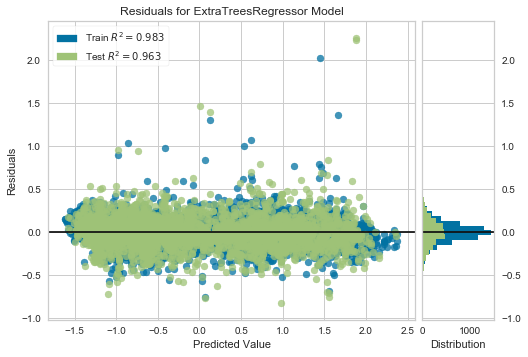

In [341]:
plot_model(tuned_model)

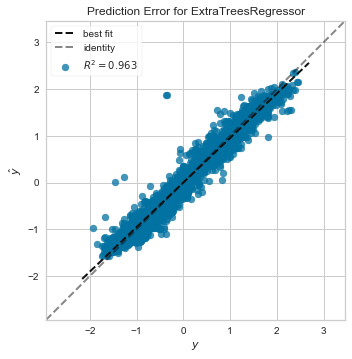

In [342]:
plot_model(tuned_model, plot='error')

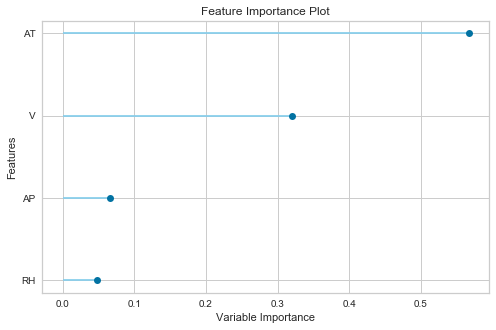

In [343]:
plot_model(tuned_model, plot='feature')

In [344]:
final_model= finalize_model(tuned_model)

In [345]:
#saving the finalized model
save_model(final_model,'Extra_Regressor_Tree_Model')

Transformation Pipeline and Model Succesfully Saved


In [347]:
#Predicting for the test data
predicted_test_data=final_model.predict(test_df)

In [360]:
#making the original unscaled and different unit of data to same unit
unscaled_target=(train['PE'].values)*1000000

In [ ]:
#Formula for unscaling the data
#X_original = (X_scale * std_of_array) + mean_of_array

In [368]:
#standard deviation of the original data
sd=np.std(unscaled_target)

In [369]:
#Mean of the original data
mean= np.mean(unscaled_target)

In [370]:
#initializing the new list to save data
X_original=[]

In [371]:
#unscaling the data
for i in predicted_test_data:
    X_original.append(((i*sd)+mean)/1000000)

In [374]:
#convrting to the series
output_PE= pd.Series(X_original, name='PE')

In [377]:
#Output of the data
output_PE.to_csv('Submission_first.csv', index=False)